In [1]:
import tensorflow as tf
from utils.architectures import resnet_152
from utils.plot import getAccuracyPlot, getLossPlot

In [2]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [3]:
model = resnet_152(output_size)

In [4]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 2048)              58370944  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 58,391,434
Trainable params: 58,240,010
Non-trainable params: 151,424
_________________________________________________________________


In [6]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 112s 152ms/step - loss: 2.4379 - accuracy: 0.2273 - val_loss: 2.4252 - val_accuracy: 0.1069
Epoch 2/100
625/625 [==============================] - 92s 147ms/step - loss: 2.3434 - accuracy: 0.1980 - val_loss: 3.1706 - val_accuracy: 0.2223
Epoch 3/100
625/625 [==============================] - 92s 148ms/step - loss: 2.2178 - accuracy: 0.2521 - val_loss: 1.9812 - val_accuracy: 0.2321
Epoch 4/100
625/625 [==============================] - 92s 147ms/step - loss: 2.3221 - accuracy: 0.2328 - val_loss: 2.9448 - val_accuracy: 0.1421
Epoch 5/100
625/625 [==============================] - 92s 147ms/step - loss: 2.2935 - accuracy: 0.2245 - val_loss: 42.2528 - val_accuracy: 0.1543
Epoch 6/100
625/625 [==============================] - 92s 147ms/step - loss: 2.2748 - accuracy: 0.2395 - val_loss: 4.0849 - val_accuracy: 0.2191
Epoch 7/100
625/625 [==============================] - 92s 147ms/step - loss: 2.1642 - accuracy: 0.2478 - val_loss: 87.537

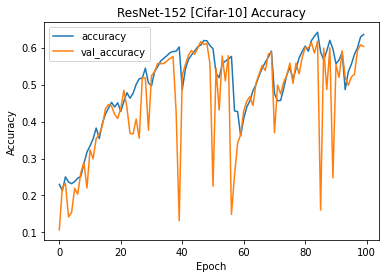

In [7]:
getAccuracyPlot(history, 'ResNet-152 [Cifar-10]')

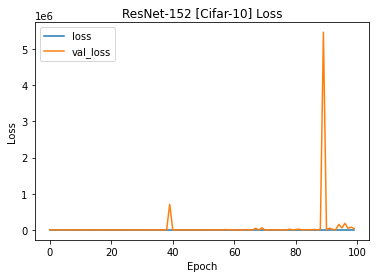

In [8]:
getLossPlot(history, 'ResNet-152 [Cifar-10]')

In [9]:
model.save('cifar10_resnet152_100epoch.h5')

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 30ms/step - loss: 125940.9297 - accuracy: 0.6667


[125940.9296875, 0.666700005531311]